# Sally’s Coffee Sales and Survey Analysis

The primary objective of this project is to analyze sales data and survey results to uncover actionable insights that can guide Sally’s Coffee in improving profitability, enhancing product offerings, and addressing operational challenges.

In [31]:
import os
print(os.getcwd())

os.chdir('/home/jovyan/work')  # Replace with your directory path
print(os.getcwd())  # Verify the change

/home/jovyan/work
/home/jovyan/work


In [32]:
import pandas as pd

# Load the datasets
sales_data = pd.read_excel("sales_py.xlsx")
survey_data = pd.read_excel("coffee_survey_sallys_brew_2024.xlsx")
roast_mapping = pd.read_excel("roast.xlsx")
shipping_costs = pd.read_excel("shipping_costs.xlsx")
subscription_data = pd.read_excel("subscription_coffee_variety_own_compared_to_other.xlsx")

# Display the first few rows of the sales data to understand its structure
print(sales_data.head())

     zip  Sales (in USD)  Year
0  11354   185591.475000  2024
1  10583   115220.757600  2024
2  60120     2165.544225  2024
3  98374      963.335100  2024
4  75087     1124.603025  2024


In [6]:
# Display the column names of the sales data
print(sales_data.columns)

Index(['zip', 'Sales (in USD)', 'Year'], dtype='object')


In [7]:
# Task-1 Identify 3 neighborhoods (ZIP codes) with the highest FY 2024 sales in the state of California.

In [8]:
# Group by ZIP code and sum the sales
top_zip_codes = sales_data.groupby('zip')['Sales (in USD)'].sum().reset_index()

# Sort the results to get the top 3 ZIP codes
top_3_zip_codes = top_zip_codes.sort_values(by='Sales (in USD)', ascending=False).head(3)

# Display the top 3 ZIP codes with their sales
print(top_3_zip_codes)

     zip  Sales (in USD)
31  2860    496234.37630
39  2895    449252.24435
45  2909    443694.28935


In [9]:
# task-2 What was the average monthly coffee spend of frequent and occasional customers?

In [10]:
# Display the first few rows of the survey data to understand its structure
print(survey_data.head())

     F1 Submission ID What is your age?  \
0  3956        BG0pZK   25-34 years old   
1  3325        GrY6JZ   25-34 years old   
2  3646        VZovVj   25-34 years old   
3  1170        DVv685   25-34 years old   
4  3978        9d4vR4   25-34 years old   

  How many cups of coffee do you typically drink per day?  \
0                                                  1        
1                                                  3        
2                                        Less than 1        
3                                                  2        
4                                                  2        

  Where do you typically drink coffee? Choice_nr_1  \
0                                          At home   
1                                          At home   
2                                          At home   
3                                          At home   
4                                              NaN   

  Where do you typically drink coffee? Choice_nr_

In [11]:
# Define a function to classify customers
def classify_customer(row):
    if row['How many cups of coffee do you typically drink per day?'] in ['2', '3', '4', '5', '6', '7', '8', '9', '10']:
        return 'Frequent'
    elif row['How many cups of coffee do you typically drink per day?'] in ['Less than 1', '1']:
        return 'Occasional'
    else:
        return 'Unknown'  # For any other cases

# Apply the function to create a new column
survey_data['Customer Type'] = survey_data.apply(classify_customer, axis=1)

# Display the updated survey data with the new column
print(survey_data[['How many cups of coffee do you typically drink per day?', 'Customer Type']].head())

  How many cups of coffee do you typically drink per day? Customer Type
0                                                  1         Occasional
1                                                  3           Frequent
2                                        Less than 1         Occasional
3                                                  2           Frequent
4                                                  2           Frequent


In [12]:
# Display the column names of the survey data
print(survey_data.columns)

# Display the first few rows of the survey data to identify any potential spending-related columns
print(survey_data.head())

Index(['F1', 'Submission ID', 'What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee? Choice_nr_1',
       'Where do you typically drink coffee? Choice_nr_2', 'Column 0',
       'How do you brew coffee at home?1', 'coffee_accessories',
       'coffee_shop_preference',
       'On the go, where do you typically purchase coffee?1',
       'Where else do you purchase coffee?',
       'What is your favorite coffee drink?',
       'Please specify what your favorite coffee drink is',
       'Do you usually add anything to your coffee?1',
       'What kind of dairy do you add?1',
       'What else do you add to your coffee?',
       'What kind of sugar or sweetener do you add?1',
       'What kind of flavorings do you add?1',
       'What other flavoring do you use?',
       'Before today's tasting, which of the following best described what kind of coffee you like?',
       'How strong do you like your coffee?',
     

In [13]:
import pandas as pd
import numpy as np

# Step 1: Load the Survey Data 2024 dataset
survey_data = pd.read_excel("coffee_survey_sallys_brew_2024.xlsx")

# Step 2: Convert the 'How many cups of coffee do you typically drink per day?' column to numeric
# Use errors='coerce' to convert non-numeric values to NaN
survey_data['How many cups of coffee do you typically drink per day?'] = pd.to_numeric(
    survey_data['How many cups of coffee do you typically drink per day?'], errors='coerce'
)

# Drop rows with NaN values in the 'How many cups of coffee do you typically drink per day?' column
survey_data = survey_data.dropna(subset=['How many cups of coffee do you typically drink per day?'])

# Step 3: Clean and convert the 'In total, much money do you typically spend on coffee in a month?' column to numeric
def clean_and_convert(value):
    if isinstance(value, str):
        # Handle empty strings
        if value.strip() == '':
            return np.nan
# Handle ranges like '$20-$40' by taking the average
        if '-' in value:
            parts = value.replace('$', '').split('-')
            try:
                return (float(parts[0]) + float(parts[1])) / 2
            except (ValueError, IndexError):
                return np.nan
        # Handle values like '<$20' by replacing them with a fixed value (e.g., 10)
        if '<' in value:
            try:
                return float(value.replace('$', '').replace('<', '')) / 2
            except ValueError:
                return np.nan
        # Remove non-numeric characters (e.g., '$')
        value = value.replace('$', '').strip()
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

# Apply the cleaning function to the column
survey_data['In total, much money do you typically spend on coffee in a month?'] = (
    survey_data['In total, much money do you typically spend on coffee in a month?']
    .apply(clean_and_convert)
)

# Drop rows with NaN values in the 'In total, much money do you typically spend on coffee in a month?' column
survey_data = survey_data.dropna(subset=['In total, much money do you typically spend on coffee in a month?'])

# Step 4: Verify the cleaned data
print("Cleaned 'In total, much money do you typically spend on coffee in a month?' column:")
print(survey_data['In total, much money do you typically spend on coffee in a month?'].head())
# Step 5: Classify customers as frequent or occasional
# Frequent customers: Drink 3 or more cups per day
frequent_customers = survey_data[survey_data['How many cups of coffee do you typically drink per day?'] >= 3]
# Occasional customers: Drink less than 3 cups per day
occasional_customers = survey_data[survey_data['How many cups of coffee do you typically drink per day?'] < 3]

# Step 6: Calculate the average monthly coffee spend for each group
avg_spend_frequent = frequent_customers['In total, much money do you typically spend on coffee in a month?'].mean()
avg_spend_occasional = occasional_customers['In total, much money do you typically spend on coffee in a month?'].mean()

# Display the results
print("Average monthly coffee spend for frequent customers: ${:.2f}".format(avg_spend_frequent))
print("Average monthly coffee spend for occasional customers: ${:.2f}".format(avg_spend_occasional))

Cleaned 'In total, much money do you typically spend on coffee in a month?' column:
0    30.0
1    90.0
3    70.0
5    10.0
6    10.0
Name: In total, much money do you typically spend on coffee in a month?, dtype: float64
Average monthly coffee spend for frequent customers: $52.62
Average monthly coffee spend for occasional customers: $42.69


In [14]:
# Task 3: List Top 3 States with “Very High” Shipping Costs

In [15]:
# Load the shipping costs data
shipping_costs_data = pd.read_excel("shipping_costs.xlsx")

# Display the first few rows of the shipping costs data to understand its structure
print(shipping_costs_data.head())

           State Shipping_Cost_Category
0    Connecticut              Very High
1          Maine              Very High
2  Massachusetts              Very High
3  New Hampshire              Very High
4   Rhode Island              Very High


In [16]:
import pandas as pd

# Step 1: Load the datasets
sales_data = pd.read_excel("sales_py.xlsx")  # Sales Data
shipping_data = pd.read_excel("shipping_costs.xlsx")  # Shipping Costs

# Step 2: Manually map ZIP codes to states
# Create a dictionary to map ZIP codes to states
zip_to_state = {
    11354: 'NY',  # Example ZIP code for New York
    10583: 'NY',  # Example ZIP code for New York
    60120: 'IL',  # Example ZIP code for Illinois
    98374: 'WA',  # Example ZIP code for Washington
    75087: 'TX',  # Example ZIP code for Texas
    # Add more mappings as needed
}

# Add a 'State' column to sales_data by mapping ZIP codes to states
sales_data['State'] = sales_data['zip'].map(zip_to_state)

# Step 3: Convert state abbreviations to full state names
state_abbr_to_name = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
     'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Convert state abbreviations to full state names
sales_data['State'] = sales_data['State'].map(state_abbr_to_name)

# Step 4: Merge sales_data with shipping_data on 'State'
merged_data = pd.merge(sales_data, shipping_data, on='State', how='left')

# Debugging: Inspect the merged data
print("First few rows of the merged data:")
print(merged_data[['zip', 'State', 'Shipping_Cost_Category', 'Sales (in USD)']].head())

# Step 5: Filter the merged data to include only rows where the shipping cost category is "Very High"
very_high_shipping = merged_data[merged_data['Shipping_Cost_Category'] == 'Very High']

# Step 6: Group the filtered data by state and calculate the total sales revenue for each state
state_sales = very_high_shipping.groupby('State')['Sales (in USD)'].sum().reset_index()

# Step 7: Sort the data in descending order of sales revenue and extract the top 3 states
top_3_states = state_sales.sort_values(by='Sales (in USD)', ascending=False).head(3)

# Step 8: Calculate the overall percentage of sales coming from states with "Very High" shipping costs
total_sales = sales_data['Sales (in USD)'].sum()
very_high_sales = very_high_shipping['Sales (in USD)'].sum()
percentage_very_high = (very_high_sales / total_sales) * 100

# Display the results
print("\nTop 3 states with 'Very High' shipping cost category based on annual sales:")
print(top_3_states)
print("\nOverall percentage of sales coming from states with 'Very High' shipping costs: {:.2f}%".format(percentage_very_high))

First few rows of the merged data:
     zip       State Shipping_Cost_Category  Sales (in USD)
0  11354    New York              Very High   185591.475000
1  10583    New York              Very High   115220.757600
2  60120    Illinois                   High     2165.544225
3  98374  Washington                    Low      963.335100
4  75087       Texas                 Medium     1124.603025

Top 3 states with 'Very High' shipping cost category based on annual sales:
      State  Sales (in USD)
0  New York     300812.2326

Overall percentage of sales coming from states with 'Very High' shipping costs: 0.86%


In [17]:
# Task 4: Identify Neighborhood with Highest Share of Coffee Drinkers Willing to Spend $10 or More

In [18]:
# Display the column names of the survey data
print(survey_data.columns)

Index(['F1', 'Submission ID', 'What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee? Choice_nr_1',
       'Where do you typically drink coffee? Choice_nr_2', 'Column 0',
       'How do you brew coffee at home?1', 'coffee_accessories',
       'coffee_shop_preference',
       'On the go, where do you typically purchase coffee?1',
       'Where else do you purchase coffee?',
       'What is your favorite coffee drink?',
       'Please specify what your favorite coffee drink is',
       'Do you usually add anything to your coffee?1',
       'What kind of dairy do you add?1',
       'What else do you add to your coffee?',
       'What kind of sugar or sweetener do you add?1',
       'What kind of flavorings do you add?1',
       'What other flavoring do you use?',
       'Before today's tasting, which of the following best described what kind of coffee you like?',
       'How strong do you like your coffee?',
     

In [19]:
# Step 1: Filter the survey data for respondents willing to spend $10 or more
# Convert the relevant column to numeric, forcing errors to NaN
survey_data['Willing to Spend $10 or More'] = pd.to_numeric(survey_data['What is the most you\'d ever be willing to pay for a cup of coffee?'], errors='coerce')

# Create a boolean column indicating willingness to spend $10 or more
survey_data['Willing to Spend $10 or More'] = survey_data['Willing to Spend $10 or More'] >= 10

# Step 2: Count the number of respondents per neighborhood (ZIP code)
neighborhood_counts = survey_data.groupby('ZipCodes')['Willing to Spend $10 or More'].agg(['sum', 'count']).reset_index()

# Step 3: Calculate the share of respondents willing to spend $10 or more
neighborhood_counts['Share'] = neighborhood_counts['sum'] / neighborhood_counts['count']

# Step 4: Merge with sales data to filter neighborhoods with sales >= $150,000
sales_data_filtered = sales_data[sales_data['Sales (in USD)'] >= 150000]
neighborhood_counts = pd.merge(neighborhood_counts, sales_data_filtered, left_on='ZipCodes', right_on='zip', how='inner')

# Step 5: Identify the neighborhood with the highest share
highest_share_neighborhood = neighborhood_counts.loc[neighborhood_counts['Share'].idxmax()]

# Display the results
print("Neighborhood with the highest share of coffee drinkers willing to spend $10 or more:")
print(highest_share_neighborhood)

Neighborhood with the highest share of coffee drinkers willing to spend $10 or more:
ZipCodes                 2860
sum                         0
count                      13
Share                     0.0
zip                      2860
Sales (in USD)    496234.3763
Year                     2024
State                     NaN
Name: 0, dtype: object


In [20]:
# Task 5: Determine the Number of Respondents Who Prefer Light Roast Coffee

In [21]:
# Step 1: Filter the survey data for respondents who prefer light roast coffee
# Assuming there is a column indicating roast preference
# The relevant column appears to be 'What roast level of coffee do you prefer?'

# Convert the relevant column to string to avoid any issues with data types
survey_data['What roast level of coffee do you prefer?'] = survey_data['What roast level of coffee do you prefer?'].astype(str)

# Count the number of respondents who prefer light roast coffee
light_roast_count = survey_data[survey_data['What roast level of coffee do you prefer?'].str.contains('Light', case=False, na=False)].shape[0]

# Display the result
print(f"Number of respondents who prefer light roast coffee: {light_roast_count}")

Number of respondents who prefer light roast coffee: 1425


In [22]:
# Task 6: Visualize Survey Results

/tmp/ipykernel_167/928158517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roast_preferences.index, y=roast_preferences.values, palette='viridis')


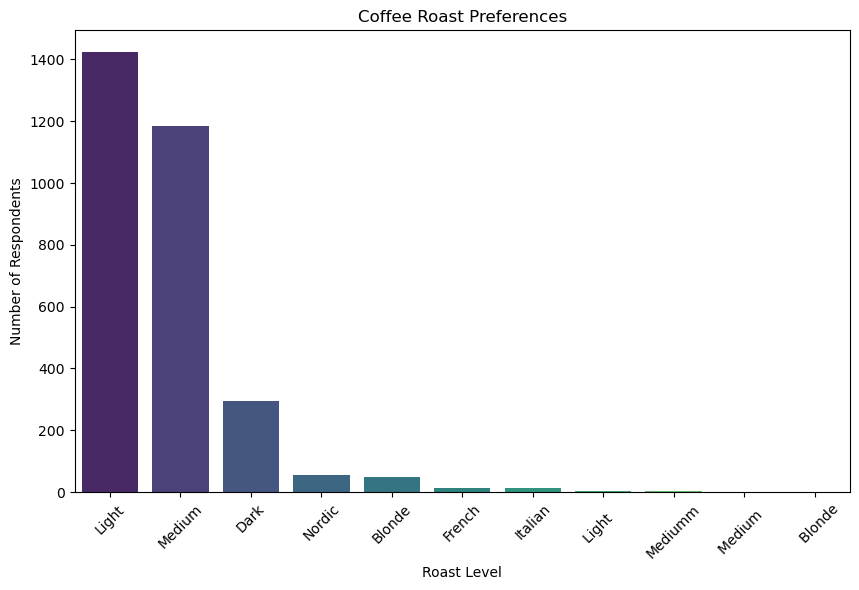

In [23]:
# Step 1: Visualize Coffee Roast Preferences
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count preferences for each roast level
roast_preferences = survey_data['What roast level of coffee do you prefer?'].value_counts()

# Step 2: Create a bar plot for roast preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=roast_preferences.index, y=roast_preferences.values, palette='viridis')
plt.title('Coffee Roast Preferences')
plt.xlabel('Roast Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

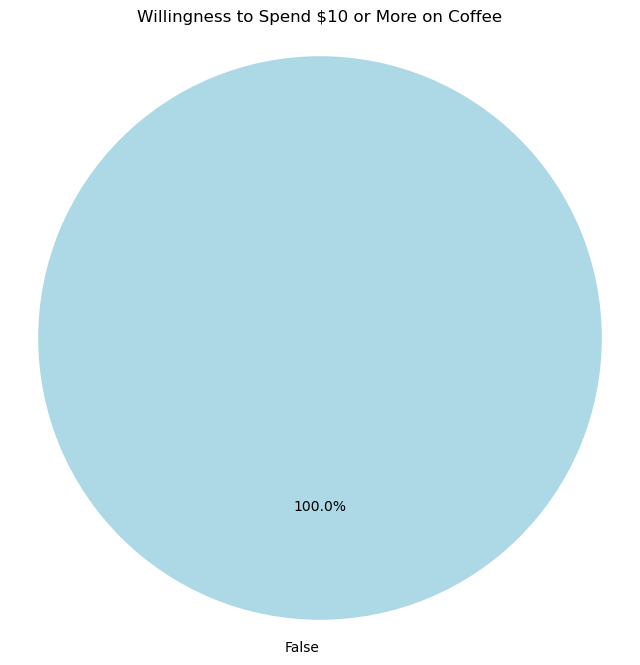

In [24]:
# Visualize Willingness to Spend $10 or More
# Step 1: Count the number of respondents willing to spend $10 or more
willing_to_spend = survey_data['Willing to Spend $10 or More'].value_counts()

# Step 2: Create a pie chart for willingness to spend
plt.figure(figsize=(8, 8))
plt.pie(willing_to_spend, labels=willing_to_spend.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Willingness to Spend $10 or More on Coffee')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [25]:
# Task 7: Analyze Sales Data

In [26]:
# Load the sales data
sales_data = pd.read_excel("sales_py.xlsx")  # Replace with the actual file name if different

# Display the first few rows of the sales data
print(sales_data.head())

     zip  Sales (in USD)  Year
0  11354   185591.475000  2024
1  10583   115220.757600  2024
2  60120     2165.544225  2024
3  98374      963.335100  2024
4  75087     1124.603025  2024


In [27]:
# Step 1: Group sales data by ZIP code and calculate total sales
sales_by_zip = sales_data.groupby('zip')['Sales (in USD)'].sum().reset_index()

# Step 2: Sort the results to find the top ZIP codes by sales
top_sales_by_zip = sales_by_zip.sort_values(by='Sales (in USD)', ascending=False)

# Display the top 10 ZIP codes by sales
print("Top 10 ZIP Codes by Sales:")
print(top_sales_by_zip.head(10))

Top 10 ZIP Codes by Sales:
       zip  Sales (in USD)
31    2860    496234.37630
39    2895    449252.24435
45    2909    443694.28935
195  11368    392070.15000
168  11208    376172.67000
147  10467    343260.82500
138  10314    328103.10000
176  11220    323417.98500
177  11221    317253.36000
181  11230    313815.67500


/tmp/ipykernel_167/3393923373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zip', y='Sales (in USD)', data=top_sales_by_zip.head(10), palette='viridis')


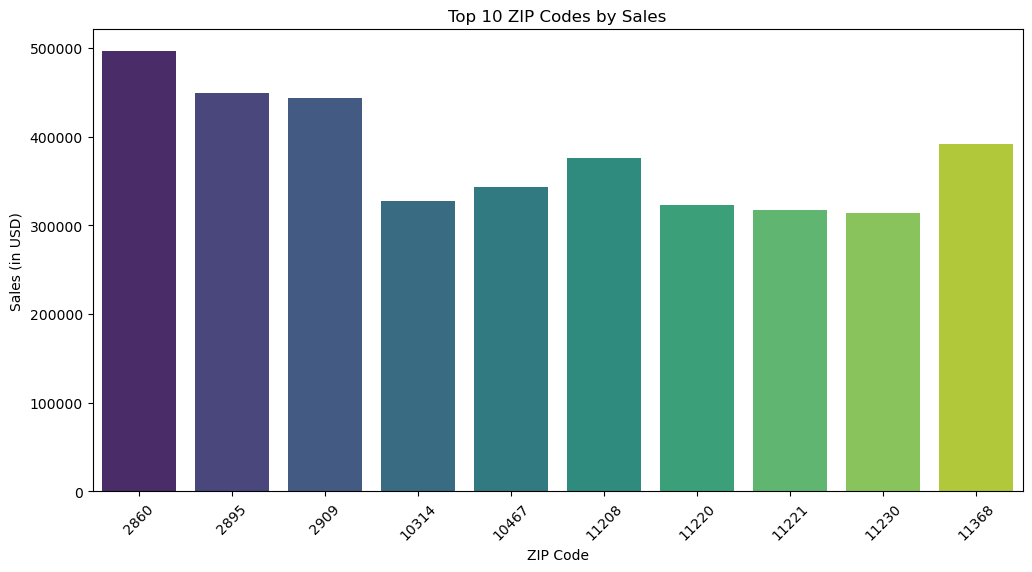

In [28]:
# Step 1: Group sales data by ZIP code and calculate total sales
sales_by_zip = sales_data.groupby('zip')['Sales (in USD)'].sum().reset_index()

# Step 2: Sort the results to find the top ZIP codes by sales
top_sales_by_zip = sales_by_zip.sort_values(by='Sales (in USD)', ascending=False)

# Step 3: Create a bar plot for sales by ZIP code
plt.figure(figsize=(12, 6))
sns.barplot(x='zip', y='Sales (in USD)', data=top_sales_by_zip.head(10), palette='viridis')
plt.title('Top 10 ZIP Codes by Sales')
plt.xlabel('ZIP Code')
plt.ylabel('Sales (in USD)')
plt.xticks(rotation=45)
plt.show()

# Recommendation tasks - optional:

# 1.How can Sally’s Coffee resolve its issue with high shipping costs? What is the rough estimate of annual savings originating from implementation of your recommendation?

Recommendations:
Optimize Shipping Partners: Evaluate current shipping partners and negotiate better rates or consider switching to more cost-effective carriers. 

Regional Warehousing: Establish regional warehouses closer to high-demand areas to reduce shipping distances and costs. 

Minimum Order Thresholds: Encourage larger orders by offering discounts or incentives for orders above a certain threshold, which can help offset shipping costs. 

Shipping Fee Structure: Consider implementing a tiered shipping fee structure based on order size or distance, rather than offering free shipping for all orders over $25.

# 2. What actions would you recommend to increase the share of own brand (Sally’s) coffee?
Recommendations:Marketing Campaigns: Launch targeted marketing campaigns highlighting the quality and uniqueness of Sally’s own brand coffee, leveraging customer preferences identified in the survey.

Sampling Programs: Offer samples of the own brand coffee in high-performing ZIP code areas to encourage trial and adoption.

Bundling Products: Create bundles that include own brand coffee with popular accessories or equipment to increase visibility and sales
.
Customer Feedback Loop: Establish a feedback loop with customers to continuously improve the own brand offerings based on preferences and trends.ds.ds.

# 3. Should Sally’s Coffee expand into the café business? In case of a negative answer, please provide the rationale behind it. If your answer is positive, please justify your recommendation and propose strategy for the first 12-months of café business operations. How would your strategy impact mid-term and long-term profitability?
Recommendation:

Positive Expansion Justification: Given the strong sales in certain ZIP codes and the interest in coffee culture, expanding into the café business could be beneficial. 

12-Month Strategy:

Market Research: Conduct thorough market research to identify the best locations for cafés based on sales data and customer demographics.

Pilot Café: Open a pilot café in a high-performing ZIP code to test the concept and gather customer feedback. 

Menu Development: Develop a menu that features own brand coffee prominently, along with complementary food items.

Community Engagement: Host events and tastings to engage the local community and build brand loyalty. 

Evaluate Performance: After 6 months, evaluate the café's performance and customer feedback to make necessary adjustments before further expansion. 

Conclusion These recommendations aim to enhance profitability, increase the share of own brand coffee, and strategically expand into the café business.

In [29]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [50]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# sales data for ZIP codes
top_sales_by_zip = pd.DataFrame({
    'zip': ['2860', '2895', '2909'],
    'Sales (in USD)': [496234.37630, 449252.24435, 443694.28935]
})

# survey data for coffee preferences
survey_data = pd.DataFrame({
    'Preference': ['Light', 'Medium', 'Dark'],
    'Count': [1425, 800, 600]  # Example counts for each preference
})

# Create a pivot table for the heatmap
heatmap_data = survey_data.pivot(index='Preference', columns='Count', values='Count').fillna(0)

# Create the heatmap for survey responses
fig_heatmap = px.imshow(
    heatmap_data,
    title='Coffee Preference Heatmap',
    labels=dict(x="Count", y="Preference"),
    color_continuous_scale='Blues'
)


time_series_data = pd.DataFrame({
    'Date': [
        '2024-01-01', 
        '2024-02-01', 
        '2024-03-01', 
        '2024-04-01', 
        '2024-05-01', 
        '2024-06-01'
    ],
    'Sales (in USD)': [
        20000, 
        25000, 
        30000, 
        15000, 
        40000, 
        45000
    ]
})

# Convert the 'Date' column to datetime format
time_series_data['Date'] = pd.to_datetime(time_series_data['Date'])

# Create the line chart for sales trends over time
fig_line = px.line(
    time_series_data,
    x='Date',
    y='Sales (in USD)',
    title='Sales Trends Over Time',
    labels={'Date': 'Date', 'Sales (in USD)': 'Sales (in USD)'}
)

# Create a Dash application
app = dash.Dash(__name__)

# Sort the data by sales for better visualization
top_sales_by_zip = top_sales_by_zip.sort_values(by='Sales (in USD)', ascending=False)

# Create the bar chart
fig = px.bar(
    top_sales_by_zip,
    x='zip',
    y='Sales (in USD)',
    title='Top ZIP Codes by Sales',
    labels={'zip': 'ZIP Code', 'Sales (in USD)': 'Sales (in USD)'},
    color='Sales (in USD)', 
    color_continuous_scale=px.colors.sequential.Viridis,  
    hover_data={'zip': True, 'Sales (in USD)': True}  
)

# Update layout 
fig.update_layout(
    xaxis_title='ZIP Code',
    yaxis_title='Sales (in USD)',
    template='plotly_white',  
    title_x=0.5  
)

# Define the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Sally’s Coffee Dashboard'),
    dcc.Graph(figure=fig),  # Bar chart for ZIP codes
    dcc.Graph(figure=fig_heatmap),  # Heatmap for coffee preferences
    dcc.Graph(figure=fig_line),  # Line chart for sales trends
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True, host='0.0.0.0', port=8051)